<font size='6'>EXPLORATORY DATA ANALYSIS</font>

---

<img src="https://www.qualtrics.com/m/assets/blog/wp-content/uploads/2018/08/blog-banner-banking-customer-churn.jpg">
<font size='3'><br>
By: Muhammad Audri Indraputra<br></font>

---

<font size='5'>**Import Libraries and Data**

In [1]:
import numpy as numpy
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
sns.set(style='whitegrid')

In [2]:
url = 'https://drive.google.com/file/d/1mGG9HwdtexXSr-AkArbXFrYl61e8yLDq/view?usp=sharing'
url = 'https://drive.google.com/uc?id='+ url.split('/')[-2]
df = pd.read_csv(url)

---

<font size='5'>**Exploratory Data Analysis**

---

<font size='5'>Data Cleaning

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<font size='3'>
Tidak terdapat missing value untuk setiap kolom.

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


---

<font size='5'>Univariate Analysis

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
column_numeric = [df.columns[3]] + df.columns[6:9].tolist() + [df.columns[-2]]
print('Column Numeric :',column_numeric)

column_binary = df.columns[4:6].tolist() + df.columns[9:12].tolist() + [df.columns[-1]]
print('Column Binary :', column_binary)

Column Numeric : ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
Column Binary : ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']


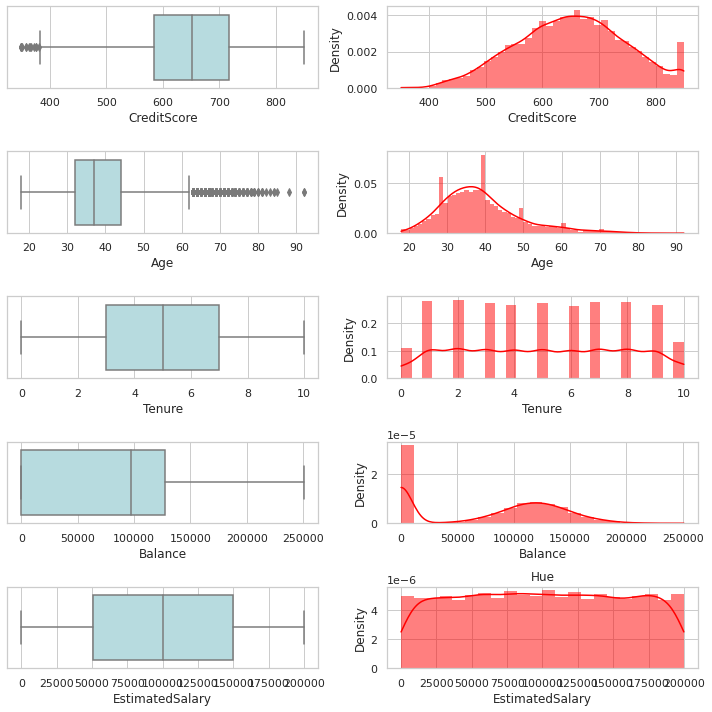

In [9]:
f, axes = plt.subplots(ncols=2, nrows=len(column_numeric), figsize=(10,10), squeeze=False)

for i in range(len(column_numeric)):
    
    #Ploting the boxplot
    sns.boxplot(x = df[column_numeric[i]], ax=axes[i][0], color='powderblue')
    plt.title('Hue')
    
    # Ploting the KDE
    sns.histplot(data=df[column_numeric[i]], ax=axes[i][1],  color="red", kde=True, stat="density", linewidth=0)
    plt.tight_layout()  

<font size='3'>
Dari grafik tersebut, dapat diambil kesimpulan sebagai berikut.<br>
<ul style='list-style-type:bullet'>
<li>Walaupun terdapat banyak outlier pada 'CreditScore' dan 'Age', outlier tersebut belum tentu mengganggu proses analisis.</li>
<li>Pelanggan berasal dari beberapa golongan (berdasarkan gaji).</li>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

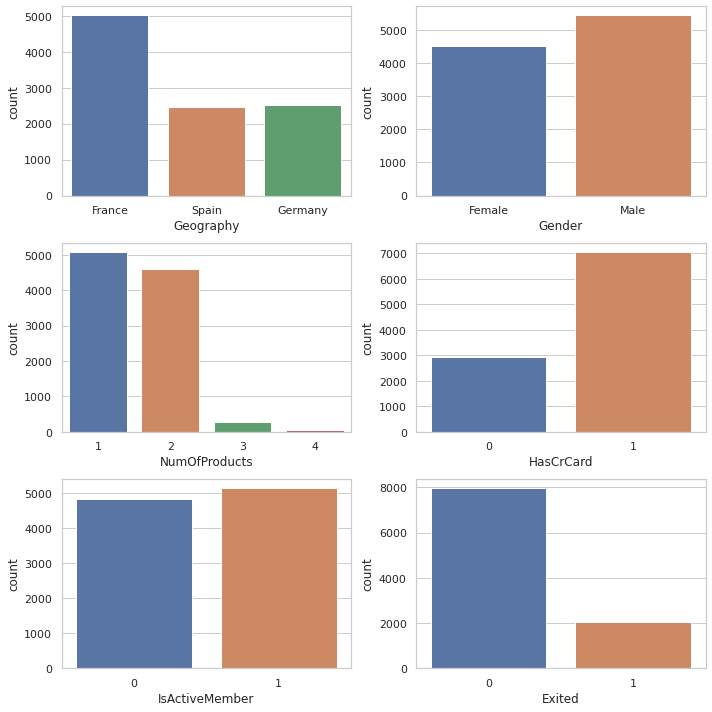

In [10]:
f, axes = plt.subplots(ncols=2, nrows=math.ceil(len(column_numeric)/2), figsize=(10,10), squeeze=False)

for i in range(len(column_binary)):
    baris = math.floor(i/2)
    kolom = i % 2
    sns.countplot(df[column_binary[i]], ax=axes[baris][kolom])
    plt.tight_layout()

<font size='3'>
Pada kumpulan grafik tersebut, dapat diambil kesimpulan sebagai berikut.<br>
<ul style='list-style-type:bullet'>
<li>Mayoritas pengguna berasal dari France.</li>
<li>Mayoritas pengguna adalah laki-laki.</li>
<li>Produk yang paling sering digunakan adalah Produk 1.</li>
<li>Kartu kredit cukup digemari oleh para pengguna.</li>
<li>Hampir setengah dari pengguna bukanlah pengguna aktif.</li>
<li>Masih terbilang cukup sedikit pengguna yang berhenti berlangganan.</ul>

---

<font size='5'>Bivariate Data Analysis

<font size='4'>Numerical Column vs Geography

In [11]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
UnGeo = df['Geography'].unique()

In [13]:
france = df.loc[df['Geography'] == UnGeo[0] ]
spain = df.loc[df['Geography'] == UnGeo[1] ]
germany = df.loc[df['Geography'] == UnGeo[2] ]

In [14]:
spain.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
11,12,15737173,Andrews,497,Spain,Male,24,3,0.00,2,1,0,76390.01,0
14,15,15600882,Scott,635,Spain,Female,35,7,0.00,2,1,1,65951.65,0


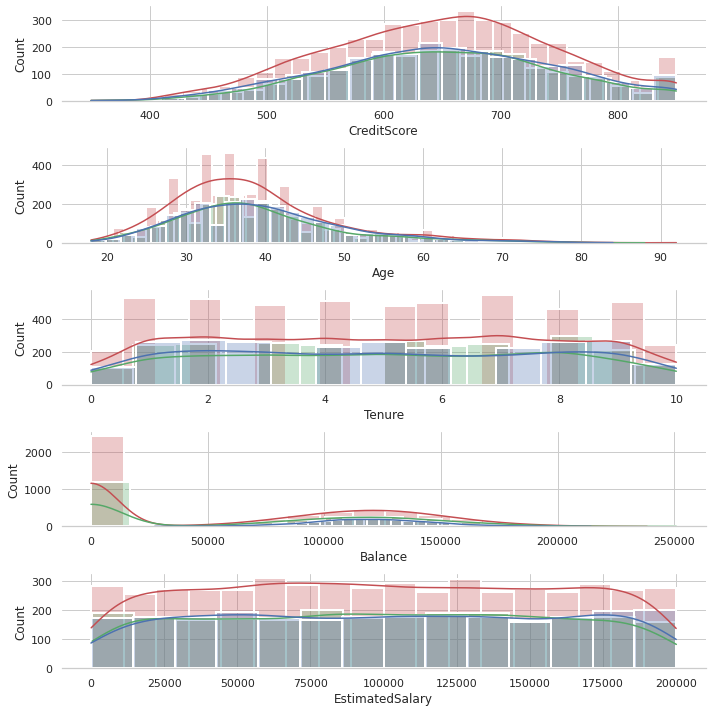

In [15]:
f, axes = plt.subplots(nrows=len(column_numeric),figsize=(10, 10), sharex=False)
sns.despine(left=True)

for i in range(len(column_numeric)):
    sns.histplot(data=france[column_numeric[i]], ax=axes[i], color='r', label=UnGeo[0], kde=True, linewidth=2, alpha=0.3)
    sns.histplot(data=spain[column_numeric[i]], ax=axes[i], color='g', label=UnGeo[1], kde=True, linewidth=2, alpha=0.3)
    sns.histplot(data=germany[column_numeric[i]], ax=axes[i], color='b', label=UnGeo[2], kde=True, linewidth=2, alpha=0.3)
    plt.tight_layout()

---

<font size='5'>Multivariate Analysis

In [16]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

<font size='4'>Correlation

In [17]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<font size='4'>All Numeric Columns vs All Numeric Columns

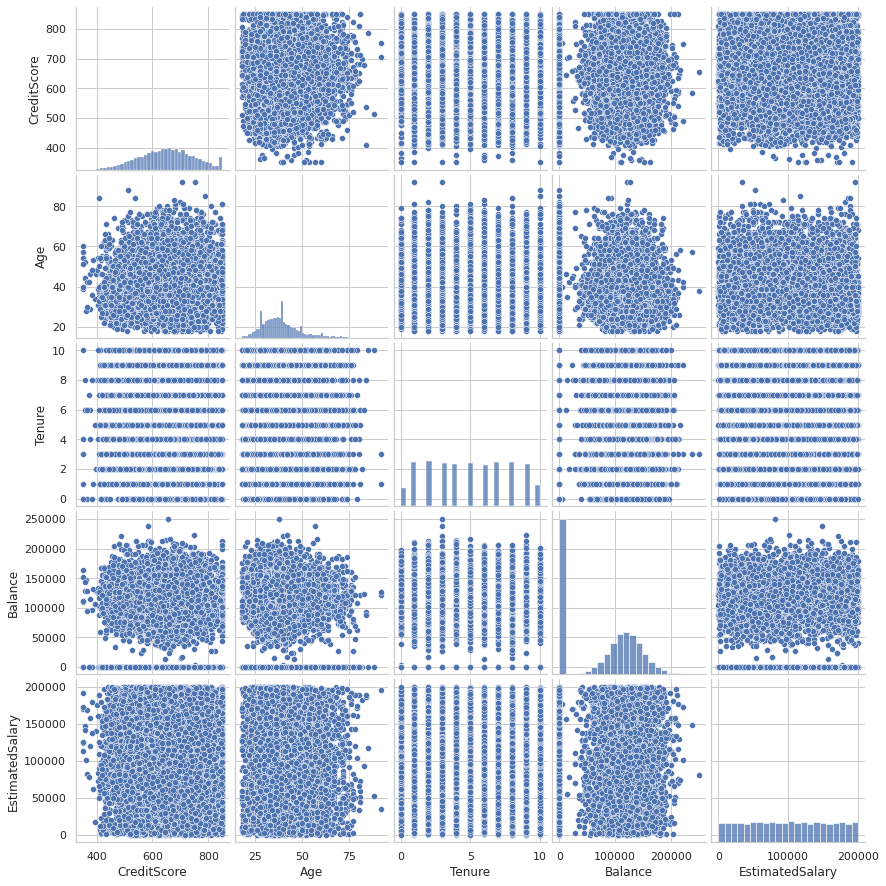

In [18]:
sns.pairplot(df[column_numeric], diag_kind='hist')
plt.show()

<font size='4'>Plotting Swarm and Box Plots

In [19]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [20]:
len(column_numeric)

5

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 98.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 97.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 97.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 98.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 98.0% of the points cannot be placed; y

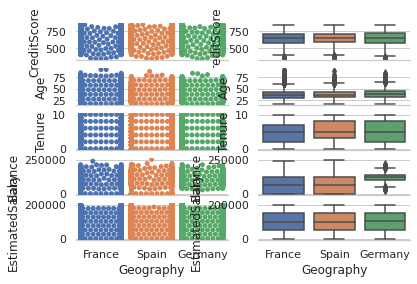

In [21]:
f, axes = plt.subplots(nrows=len(column_numeric), ncols = 2, sharex=False)
sns.despine(left=True)

for i in range(len(column_numeric)):
    sns.swarmplot(x=df['Geography'], y=df[column_numeric[i]], ax=axes[i][0])
    sns.boxplot(x=df['Geography'], y=df[column_numeric[i]], ax=axes[i][1])

plt.tight_layout()